In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pickle
import json

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [4]:
df.shape

(13320, 9)

Cleaning Data

In [5]:
df.groupby("area_type")["area_type"].aggregate("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df.drop(["area_type", "availability", "society"], inplace=True, axis="columns")

In [7]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [8]:
df.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.shape

(12710, 6)

In [10]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [11]:
def room_num(x):
        return int(x.split()[0])

In [12]:
df["room_num"] = df["size"].apply(room_num)

In [13]:
df.head(2)

,location,size,total_sqft,bath,balcony,price,room_num
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4


In [14]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
df.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [16]:
df.drop(["balcony"], axis="columns", inplace=True)

In [17]:
df.head(2)

,location,size,total_sqft,bath,price,room_num
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [18]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
df_mod = df.copy()
df_mod.head(2)

,location,size,total_sqft,bath,price,room_num
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [20]:
def convert_to_floats(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        new_num = (float(tokens[0]) + float(tokens[1]))/2
        return new_num
    else:
        try:
            return float(x)
        except:
            return None


In [21]:
df_mod["total_sqft"] = df["total_sqft"].apply(convert_to_floats)

In [22]:
df_mod.head(2)

,location,size,total_sqft,bath,price,room_num
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [23]:
df_mod["price/sqft"] = (df_mod["price"]/df_mod["total_sqft"])*100_000

In [24]:
df_mod.head(2)

,location,size,total_sqft,bath,price,room_num,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615


In [25]:
df_mod.rename(columns={"room_num": "num_of_rooms", "price/sqft": "price_per_sqft"}, inplace=True)
df_mod.drop(["size"], axis="columns", inplace=True)

In [26]:
df_mod.head(2)

,location,total_sqft,bath,price,num_of_rooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615


In [27]:
df_mod["location"] = df_mod["location"].apply(lambda i: i.strip())
len(df_mod["location"].unique())

1254

In [28]:
location_stat_vector = df_mod.groupby("location")
# produces a column called location
location_stat_vector = location_stat_vector["location"].aggregate("count")
location_stat_vector.sort_values(ascending=False)

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [29]:
location_stat_vector <=12

location
1 Annasandrapalya                                  True
1 Giri Nagar                                       True
1 Ramamurthy Nagar                                 True
12th cross srinivas nagar banshankari 3rd stage    True
1A Block Koramangala                               True
                                                   ... 
south                                              True
t.c palya                                          True
tc.palya                                           True
vinayakanagar                                      True
whitefiled                                         True
Name: location, Length: 1254, dtype: bool

In [30]:
df_mod["location"] = df_mod["location"].apply(lambda x: "other" if x in location_stat_vector[location_stat_vector <=12] else x)

In [31]:
df_mod.head()

,location,total_sqft,bath,price,num_of_rooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


Removing outliers and anomalies

In [32]:
def cleaning_anomalies(df):
    new_df = pd.DataFrame()
    for key, value in df.groupby("location"):
        mean = np.mean(value.price_per_sqft)
        stdv = np.std(value.price_per_sqft)
        cleaned_df = value[(value.price_per_sqft > (mean - stdv)) & (value.price_per_sqft <= (mean + stdv))]
        
        new_df = pd.concat([new_df, cleaned_df], ignore_index=True)
    return new_df

In [33]:
df_cleaned = cleaning_anomalies(df_mod)

In [34]:
df_cleaned.head(2)

,location,total_sqft,bath,price,num_of_rooms,price_per_sqft
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667


In [35]:
# Removing inconsistencies in bedroom prices
def bedroom_anomalies_remove(data_frame):
    drop_indexes = np.array([])
    bedroom_stats = {}
    for location, location_df in data_frame.groupby("location"):
        for bedrooms, bedrooms_df in location_df.groupby("num_of_rooms"):
            bedroom_stats[bedrooms] = {
                "mean": np.mean(bedrooms_df["price_per_sqft"]),
                "stdv": np.std(bedrooms_df["price_per_sqft"]),
                "count": bedrooms_df.shape[0]
            }
        for bedrooms, bedrooms_df in location_df.groupby("num_of_rooms"):
            stats = bedroom_stats.get(bedrooms-1)
            if stats and stats["count"] > 5:
                drop_indexes = np.append(drop_indexes, bedrooms_df[bedrooms_df["price_per_sqft"] < (stats["mean"])].index.values)
    return data_frame.drop(drop_indexes, axis="index")


In [36]:
cleaned_df = bedroom_anomalies_remove(df_cleaned)

In [37]:
cleaned_df

,location,total_sqft,bath,price,num_of_rooms,price_per_sqft
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
2,1st Phase JP Nagar,2065.0,4.0,210.0,3,10169.491525
3,1st Phase JP Nagar,2059.0,3.0,225.0,3,10927.634774
4,1st Phase JP Nagar,1394.0,2.0,100.0,2,7173.601148
5,1st Phase JP Nagar,1077.0,2.0,93.0,2,8635.097493
...,...,...,...,...,...,...
10916,other,2000.0,2.0,360.0,3,18000.000000
10917,other,1140.0,1.0,185.0,2,16228.070175
10922,other,1353.0,2.0,110.0,2,8130.081301
10923,other,812.0,1.0,26.0,1,3201.970443


In [38]:
def scatter_plt(data_frame, location: str):
    two_bedroom = data_frame[(data_frame["location"] == location) & (data_frame["num_of_rooms"] ==2)]
    three_bedroom = data_frame[(data_frame["location"] == location) & (data_frame["num_of_rooms"] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15, 7)
    plt.scatter(two_bedroom["total_sqft"], two_bedroom["price_per_sqft"], color="red", label="2 bedroom house", s=50)
    plt.scatter(three_bedroom["total_sqft"], three_bedroom["price_per_sqft"], color="blue", marker="*", label="3 bedroom house", s=30)
    plt.title(location)
    plt.xlabel("total square feet area")
    plt.ylabel("price/square feet")
    plt.legend()

In [39]:
# list(df_cleaned["location"].unique())

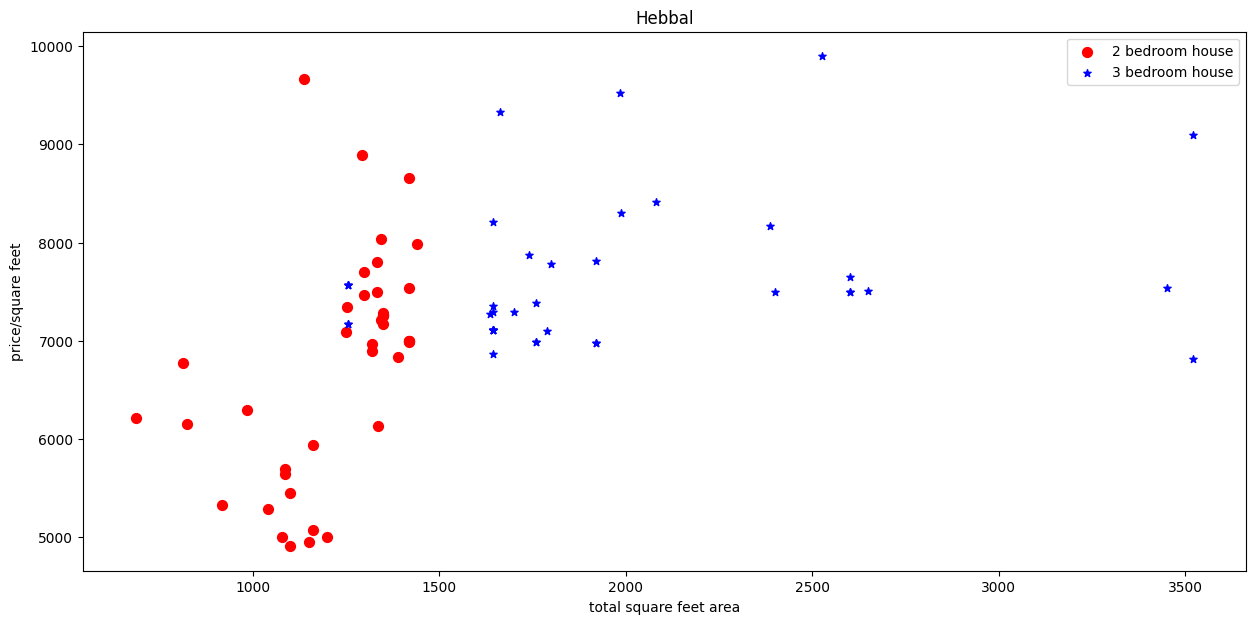

In [40]:
scatter_plt(cleaned_df, "Hebbal")

Text(0.5, 1.0, 'Prices')

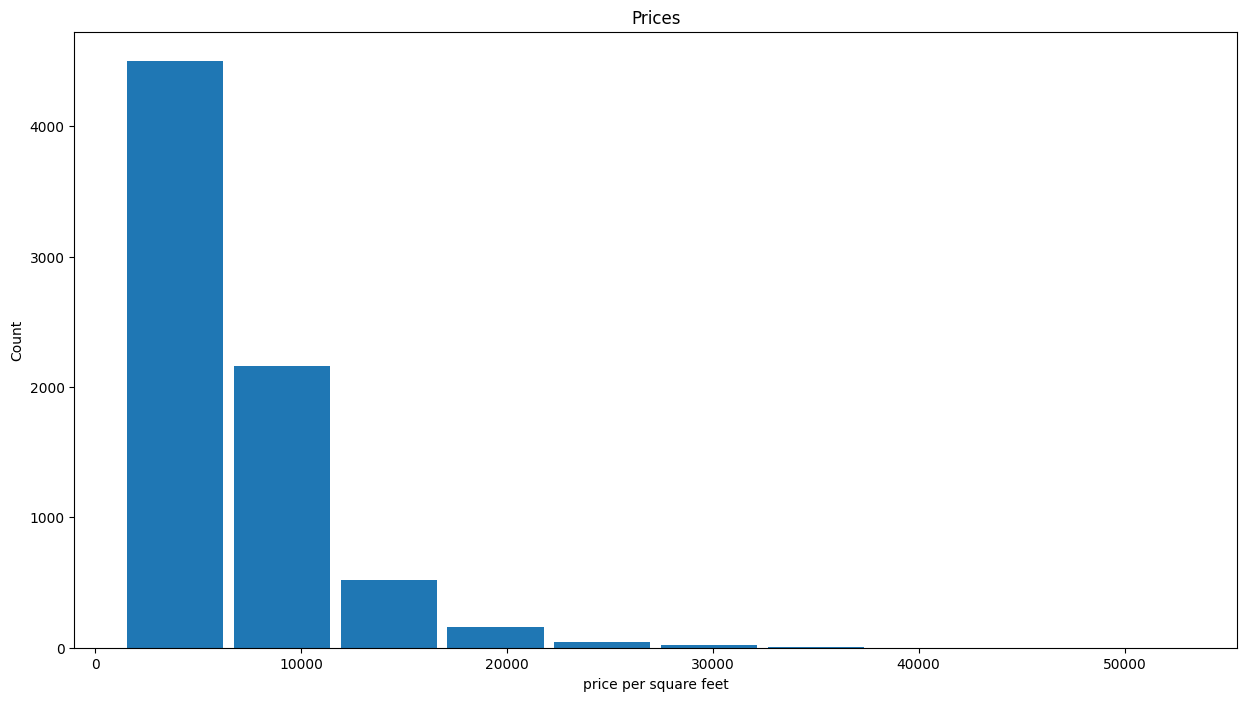

In [41]:
#plotting the price per square inch histogram
matplotlib.rcParams["figure.figsize"] = (15, 8)
plt.hist(cleaned_df["price_per_sqft"], rwidth=.9)
plt.xlabel("price per square feet")
plt.ylabel("Count")
plt.title("Prices")

In [42]:
cleaned_df.head(2)

,location,total_sqft,bath,price,num_of_rooms,price_per_sqft
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
2,1st Phase JP Nagar,2065.0,4.0,210.0,3,10169.491525


(array([6.448e+03, 8.790e+02, 5.800e+01, 1.800e+01, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. , 16.6, 19.2, 21.8, 24.4, 27. ]),
 <BarContainer object of 10 artists>)

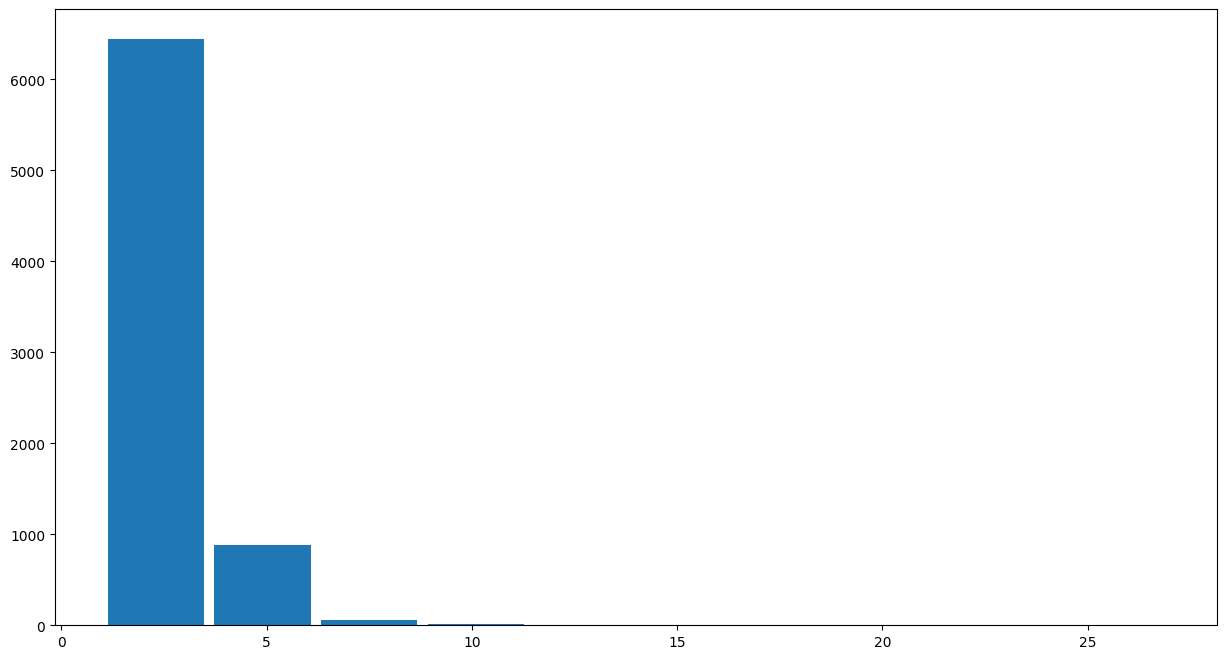

In [43]:
plt.hist(cleaned_df["num_of_rooms"], rwidth=.9)

In [44]:
cleaned_df[cleaned_df["bath"] > cleaned_df["num_of_rooms"] + 2]

,location,total_sqft,bath,price,num_of_rooms,price_per_sqft
1443,Chamrajpet,1500.0,9.0,230.0,6,15333.333333
1577,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
6551,Thanisandra,1806.0,6.0,116.0,3,6423.034330
10125,other,2400.0,6.0,775.0,3,32291.666667


In [45]:
cleaned_df = cleaned_df[cleaned_df["bath"] < cleaned_df["num_of_rooms"] + 2]

In [46]:
df = cleaned_df.drop(["price_per_sqft"], axis="columns")
df.head(2)

,location,total_sqft,bath,price,num_of_rooms
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,2065.0,4.0,210.0,3


In [47]:
# using one hot encoding for the location vector
one_hot = pd.get_dummies(df["location"])

In [48]:
df = pd.concat([df, one_hot], axis="columns")
df.drop(["location", "other"], axis="columns", inplace=True)
df.head(2)

,total_sqft,bath,price,num_of_rooms,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2065.0,4.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# creating and spliting data for trainning
X = df.drop(["price"], axis="columns")
y = df["price"]

In [50]:
X.head(2)

,total_sqft,bath,num_of_rooms,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2065.0,4.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y.head(2)

1    167.0
2    210.0
Name: price, dtype: float64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
    random_state=10
)

In [53]:
regr = LinearRegression()

In [54]:
regr.fit(X_train, y_train)

LinearRegression()

In [55]:
regr.score(X_test, y_test)

0.6415818311233678

In [56]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [57]:
cross_validation = ShuffleSplit(n_splits=5, train_size=.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cross_validation)


array([ 6.60385162e-01,  6.46557174e-01, -5.74922149e+17,  6.66221615e-01,
       -5.61211549e+15])

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [59]:
def best_pred_model(X,y):
    
    algorithms = {
        "LR": {
            "model": LinearRegression(),
            "params": {
                "fit_intercept": [True, False]
            }
        },
        "DT": {
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion": ["mse", "friedman_mse"],
                "splitter": ["best", "random"]
            }
        },
        "Lasso":{
            "model": Lasso(),
            "params": {
                "alpha": [1, 2],
                "selection": ["random", "cyclic"]
            }
        }
    }
    results = []    
    cross_validation = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo, configuration, in algorithms.items():
        grid_search = GridSearchCV(configuration["model"],configuration["params"] , cv=cross_validation, return_train_score=False)
        grid_search.fit(X,y)

        results.append({
            "model": algo,
            "best_score": grid_search.best_score_,
            "best_parameter": grid_search.best_params_
        })
    return pd.DataFrame(results, columns=["model", "best_score"])

In [60]:
best_pred_model(X, y)

c:\Users\Chiemerie\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Chiemerie\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Chiemerie\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\Chiemerie\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\tree\_

,model,best_score
0,LR,0.700529
1,DT,0.409889
2,Lasso,0.611352


In [61]:
# LR is the best

In [62]:
X.head(1)

,total_sqft,bath,num_of_rooms,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#predicting with the best linear model
def price_prediction(loc, sft, bath, bedrooms):
    location_index = np.where(X.columns==loc)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sft
    x[1] = bath
    x[2] = bedrooms
    if location_index >= 0:
        x[location_index] = 1

    return regr.predict([x])[0]

In [64]:
X.columns[3:20]

Index(['1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Phase JP Nagar',
       '6th Phase JP Nagar', '7th Phase JP Nagar', '8th Phase JP Nagar',
       '9th Phase JP Nagar', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale'],
      dtype='object')

In [65]:
price_prediction("2nd Stage Nagarbhavi", 1000, 5, 4)

c:\Users\Chiemerie\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


178.79097557116478

In [66]:
price_prediction("Indira Nagar", 3000, 4, 5)

c:\Users\Chiemerie\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


376.1034522061105

In [67]:
#Exporting the prediction model to a pickle file
with open("bengaluru_house_price_model.pickle", "wb") as file:
    pickle.dump(regr, file)

In [71]:
cols = {
    "array_columns": [col.lower() for col in X.columns]
}
with open("array_columns.json", "w") as file:
    file.write(json.dumps(cols))